# Data Processing Approach for Portfolio Project
--------------------------------------------------------------------------------
## **Project Title**:  **Lung Segmentation of Normal, Viral Pneumonia, and COVID-affected Lungs**
--------------------------------------------------------------------------------

## **Student Name**: **Esther MBANZABIGWI**

---
1.Data Sources and Aggregation

Data Sources:

The primary dataset for this project is the COVID-19 Radiography Dataset, which is publicly available. Additional sources can include:

.Peer-reviewed articles that provide annotated radiography datasets.

.Open medical imaging repositories like MedPix and The Cancer Imaging Archive.

.Research papers detailing pneumonia cases and lung scans.


Data Aggregation:

Aggregating data from multiple sources ensures comprehensive modeling and analysis. For instance, combining COVID-19 radiographs with general pneumonia and healthy lung datasets improves model robustness.





2. **Data Format Transformation:**
   Current Data Format:
The dataset consists of images stored in .png format, organized by folder labels for each category (Normal, Pneumonia, and COVID).

Planned Transformation:
Images will be resized (e.g., 224x224) to ensure uniformity across training. File paths will be mapped to corresponding labels in a structured format (e.g., CSV or Pandas DataFrame).

3. **Data Exploration:**
   
Features:

Input Features: Pixel intensities of radiograph images.

Target Feature: Class labels (Normal, Pneumonia, COVID).

Exploratory Data Analysis (EDA):
Analyzing image histograms to understand brightness and contrast distributions. Heatmaps to identify correlations among pixel values.

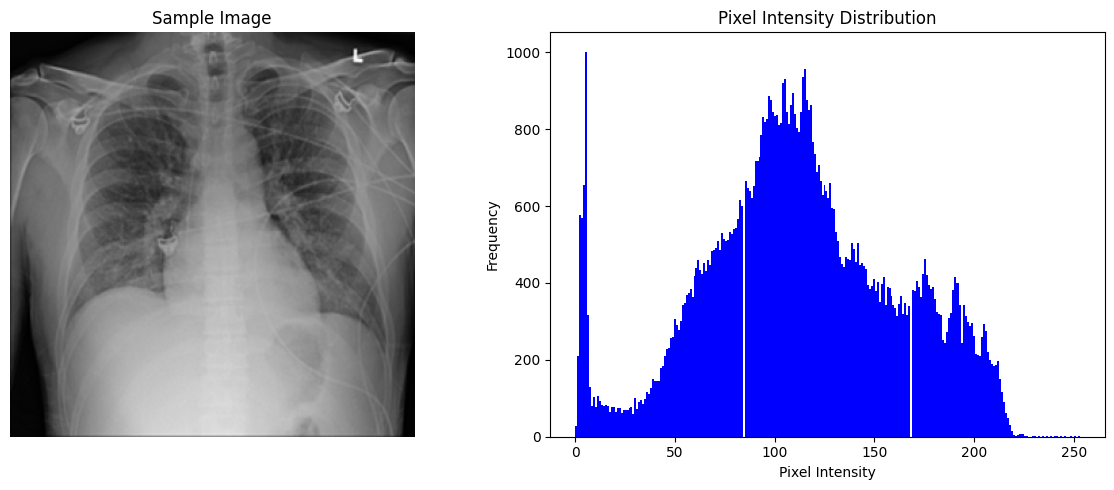

In [1]:
#Include plots for EDA
import matplotlib.pyplot as plt
import cv2
import os

# Load a sample image for EDA
sample_image_path = 'Normal-9993.png'  # Update this path with the actual file path
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if sample_image is None:
    print(f"Error: Could not load image from {sample_image_path}. Please check the file path and ensure the image exists.")
else:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the sample image
    axes[0].imshow(sample_image, cmap='gray')
    axes[0].set_title('Sample Image')
    axes[0].axis('off')

    # Plot the histogram of pixel intensities
    axes[1].hist(sample_image.ravel(), bins=256, color='blue')
    axes[1].set_title('Pixel Intensity Distribution')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()




4. **Hypothesis Testing:**
   
  

Hypotheses:

COVID-affected lungs exhibit unique radiographic patterns compared to normal and pneumonia-affected lungs.
Augmented datasets improve model performance by mitigating overfitting.

Methodology:

Test the model's ability to distinguish lung categories based on image patterns using classification metrics like accuracy and recall.

5. **Handling Sparse/Dense Data and Outliers:**
   

Density Assessment:
Sparse data in underrepresented categories (e.g., COVID scans).

Strategies:

Data augmentation (e.g., rotation, flipping).
Outlier detection using visual analysis and pixel intensity thresholds.


   

In [2]:
# Detecting and removing outlier images with extreme pixel intensities
import numpy as np

def detect_outliers(image_array):
    mean_intensity = np.mean(image_array)
    if mean_intensity < 10 or mean_intensity > 245:  # Thresholds for outliers
        return True
    return False


6. **Data Splitting:**
   
Methodology:
Use an 80-10-10 split for training, validation, and testing datasets. Employ stratified sampling to preserve label proportions.

7. **Bias Mitigation:**
  
Techniques:

Oversample minority classes using SMOTE for tabular data or image augmentation for image data.

Ensure equitable distribution of radiographs by demographics.

   
    **Your answer for Hypothesis Testing goes here **



In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the dataset directory
dataset_dir = 'Normal-9993.png'  # Replace with your actual dataset path

# Create a DataFrame with image paths and labels
data = pd.DataFrame([
    {'Normal-9993.png': os.path.join(root, file), 'labels': os.path.basename(root)}
    for root, _, files in os.walk(dataset_dir) for file in files
])

# Check if the DataFrame was created successfully
print(data.head())  # Ensure the DataFrame has 'image_path' and 'labels' columns

# Split data into train, validation, and test sets (stratified)
train, temp = train_test_split(data, test_size=0.2, stratify=data['labels'], random_state=42)
val, test = train_test_split(temp, test_size=0.5, stratify=temp['labels'], random_state=42)

# Print sizes of each split
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")

# Preview splits
print("\nSample training data:")
print(train.head())
print("\nSample validation data:")
print(val.head())
print("\nSample test data:")
print(test.head())


Empty DataFrame
Columns: []
Index: []


KeyError: 'labels'

8. **Features for Model Training:**
   
   Relevant Features:

Pixel intensity values.

Augmented image variations (rotated, flipped, etc.).

Ranking Features:
Use feature importance analysis via trained CNN model visualizations.

9. **Types of Data Handling:**

Data Types:

Numerical: Pixel intensities.

Categorical: Class labels.

Preprocessing:

Normalize pixel intensities (0-1 scaling) and encode labels numerically.



   


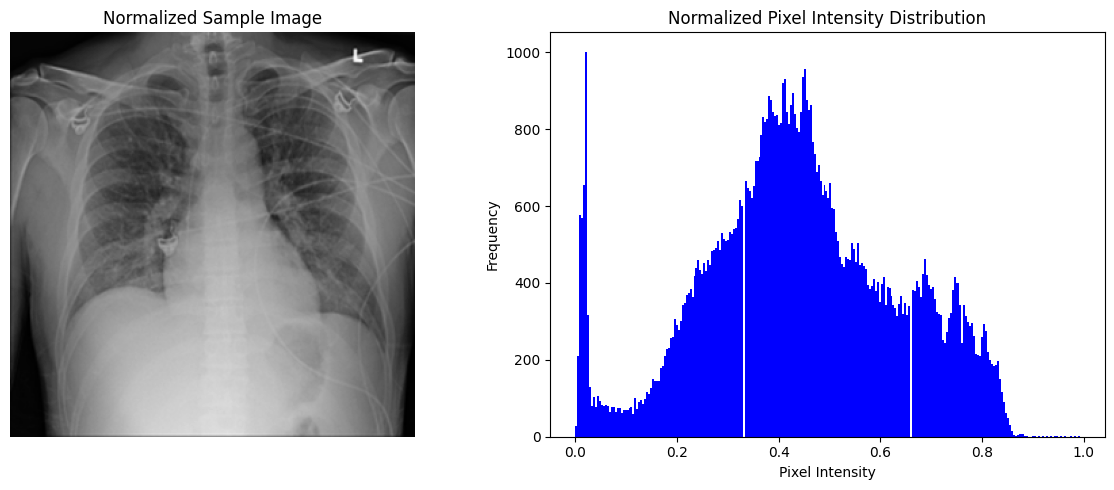

Original Labels: ['Normal', 'Pneumonia', 'COVID']
Encoded Labels: [1 2 0]


In [4]:
#print out relevant features 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Sample image path
sample_image_path = 'Normal-9993.png'  # Replace with the actual path to your image

# Load a grayscale image
sample_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if sample_image is None:
    print(f"Error: Could not load image from {sample_image_path}. Please check the file path and ensure the image exists.")
else:
    # Normalize pixel intensities (scaling 0 to 1)
    normalized_image = sample_image / 255.0  # Divide by 255 to scale to range [0, 1]
    
    # Simulate categorical class labels
    class_labels = ['Normal', 'Pneumonia', 'COVID']  # Example labels
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(class_labels)
    
    # Create a figure with two subplots for EDA
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Display the sample normalized image
    axes[0].imshow(normalized_image, cmap='gray')
    axes[0].set_title('Normalized Sample Image')
    axes[0].axis('off')

    # Plot the histogram of normalized pixel intensities
    axes[1].hist(normalized_image.ravel(), bins=256, color='blue')
    axes[1].set_title('Normalized Pixel Intensity Distribution')
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    # Output encoded labels
    print(f"Original Labels: {class_labels}")
    print(f"Encoded Labels: {encoded_labels}")



10. **Data Transformation for Modeling:**

Methods:

Normalization of pixel values.

Encoding categorical labels.

11. **Data Storage:**

Storage Solution:

Processed data stored in an AWS S3 bucket with access controls or a local directory structured for reproducibility.
---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.